In [39]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
lrm = LinearRegression()

In [50]:
y = np.array([250000, 300000, 150000, 78000, 150000])
X = np.array([[1, 3, 2000, 1, 0, 0], [1, 2, 800, 0, 1, 0], [1, 2, 850, 1, 0, 0], [1, 1, 550, 1, 0, 0], [1, 4, 2000, 0, 0, 1]])


In [9]:
lrm.fit(X, y) #fit vuole come X una matrice, se abbiamo un array la otteniamo
# a partire ad esempio da X[:, None]

LinearRegression()

In [20]:
X_new = np.array([1, 2, 3300, 0, 1, 0]).reshape(1, -1)
X_new

array([[   1,    2, 3300,    0,    1,    0]])

In [21]:
y_pred = lrm.predict(X_new)
y_pred


array([382352.94117655])

In [35]:
X = np.linspace(1, 100, 10)
y = (3 * X + 1).reshape(-1, 1)
X, y

(array([  1.,  12.,  23.,  34.,  45.,  56.,  67.,  78.,  89., 100.]),
 array([[  4.],
        [ 37.],
        [ 70.],
        [103.],
        [136.],
        [169.],
        [202.],
        [235.],
        [268.],
        [301.]]))

In [36]:
lrm.fit(X[:, None], y)

LinearRegression()

In [45]:
X_new = np.array([200])
y_pred = lrm.predict(X_new[:, None])

In [46]:
y_pred

array([[601.]])

In [47]:
lrm.coef_, lrm.intercept_

(array([[3.]]), array([1.]))

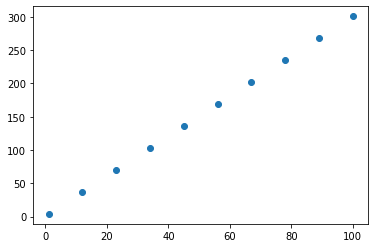

In [48]:
plt.scatter(X, y)

#### Overfitting
**overfitting** significa che il modello ha perso di generalità:
risulta cioè troppo aderente ai dati di training e questo si ripercuote
sul fatto che l'errore compiuto sui dati di training è notevolmente inferiore
a quello compiuto sui dati di testing.
Questo tipicamente accade perché, dal punto di vista matematico, i parametri
ricalcano perfettamente la curva (se non lineare) che passa per i punti forniti
in input in fase di training.

Se volessimo verificare se c'è overfitting, potremmo ad esempio calcolare l'errore quadratico medio che c'è sulla predizione fatta sul dataset di training e su quello di validazione. Ad esempio cosi

```python
    lrm = LinearRegression()
    lrm.fit(X_train, y_train)
    np.mean((lrm.predict(X_train) - y_train)**2) 
    0.02291582249089107
    np.mean((lrm.predict(X_val) - y_val)**2) 
    0.019989933582418993
```
Vediamo che rimaniamo sullo stesso ordine di grandezza e addirittura l'errore più grande è quello commesso sul set di training. Quindi non vi è overfitting.

È anche possibile usare il **Mean Absolute Percentage Error** che non è altro che l'errore medio assoluto percentuale, che è molto più indicativo degli scarti quadratici medi.
Si ottiene come

$$
\text{MAPE} = \frac{1}{m} \sum_{i=1}^m | \frac{\tilde{y_i} - y_i}{y_i}|
$$

Banalmente potremo calcolarla come
```python
    np.mean(np.abs((lrm.predict(X_train) - y_train) / y_train))
    0.05899891472169821
    np.mean(np.abs((lrm.predict(X_val) - y_val) / y_val))
    0.05170223216469662
```

Si può anche calcolare il cosiddetto **Coefficiente di determinazione $R^2$** che indica la proporzione fra variabilità dei dati e correttezza del modello.
Si calcola come 

$$
R^2 = \frac{\sum_{i=1}^m (\tilde{y}_i - \bar{y})^2}{\sum_{i=1}^m (y_i - \bar{y})^2}
$$

dove al numeratore si ha la sommatoria dei quadrati delle differenze di ogni $y_i$ predetta (per quello la tilde) e della $y$ media (con la barra), e al denominatore la sommatoria dei quadrati delle differenze fra la $y_i$ presa dai dati meno il valore medio della $y$

Può variare nell'intervallo[0, 1], dove 
- 1 indica che il modello cattura perfettamente i dati
- 0 non vi è alcuna relazione fra modello e dati

Con **scikit-learn** si può calcolare con *lrm.score()* come segue

```python 
    lrm.score(X_train, y_train)
    0.768433269368844
    lrm.score(X_val, y_val)
    0.7508669565801295
```

#### Importanza dei dati
I dati ovviamente servono per qualsiasi tipo di addestramento, tuttavia servono anche per la validazione del training. Cioè una parte dei dati in nostro possesso serviranno, una volta concluso il training, per verificare se è avvenuto correttamente. Come vengono suddivisi i dati in dati di training e di validation? Esistono diversi approcci.

1. **Hold Out**. In altre parole si suddividono i dati in due insiemi (secondo una porzione definita come 70-30) in **training set** e **validation set**. Il primo servirà per il training, il secondo è usato dopo l'addestramento per controllare la *capacità di generalizzazione* del sistema, cioè capire se è in grado di predire una risposta su dati ignoti: se l'errore è simile a quello del training si assume che abbia generalizzato bene. Se invece è consistente significa che c'è *overfitting* o i dati di training raccolti non sono indicativi del dominio di appartenenza. Con scikit-learn possiamo suddividerli, ad esempio in 70-30, in automatico con il seguente codice 

```python 
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7)
```
